# MSP Simulation Example
# Uncertain System Analysis - Classical Polynomial Chaos

## Sample Circuit

<img src="Circuit_RL.png" width="300" align="left">

$L$=$5 mH$  
$E$=$2 V$   

Uncertain parameter in the system is the resistance with the uniform distribution:      
$R$=$R_0 \pm \Delta R $  
$R_0$=$0.4 \Omega$   
$\Delta R$=$0.05 \Omega$

### Deterministic Solution of the Circuit

Euler-Forward integration method:   
$I(k) = (1-T_s*R/L) * I(k-1) + Ts/L*E$


## Circuit and Simulation Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(sign=' ')

# Circuit parameters:
E = 2.0
L = 5.0e-3
R0 = 0.4
R1 = 0.05

# Total simulation time
T_total = 0.08
# Simulaiton time step 
Ts = 0.1e-3
# Number of simulation time steps
npoint = int(np.round(T_total/Ts))

print('Total simulation time: ' + str(T_total))
print('\nSimulation time step: ' + str(Ts))

Total simulation time: 0.08

Simulation time step: 0.0001


## Monte Carlo Simulation Method

In [2]:
# Number of samples for Monte Carlo simultion runs  
N = 40

# Generate random variable 
rand_var = np.random.uniform(-1, 1, N)
print('Random variable: \n' + str(rand_var))

# R is a random parameter with the uniform distribution R= R0 + R1*rand_var 
R = np.array([ R0 + R1*rand_var ])
print('\n Resistor R: \n' + str(R))

# Solution vector for current I
# Each row refers to a solution vector obtained in one Monte Carlo simulation run
I = np.zeros((N, npoint)) 

# Monte Carlo simulation loop (for each sample of random parameter R)
for j in np.arange(0,N-1):
    # Value of random parameter R for this Monte Carlo simulation run
    Rj = R[0, j]
    
    # Time loop
    # Initial condition
    I[j,0]=0;
    for i in np.arange(1,npoint):
        # Euler Forward used for discretization 
        I[j,i] = (1-Ts*Rj/L) * I[j,i-1] + Ts/L*E

Random variable: 
[ 0.90428087  0.53248404 -0.13303251 -0.56861459  0.52258686 -0.73308335
 -0.67615307  0.56047822  0.54786871 -0.31086864  0.99776139  0.45684177
  0.10948599 -0.91679866  0.468342    0.63100519  0.21468186 -0.04364145
  0.43295499  0.74741937 -0.31142532 -0.1458604  -0.60147188 -0.01088026
  0.89628464 -0.71283873  0.60475255  0.79163581 -0.48627978  0.22462609
 -0.95647013  0.56046413  0.16330194 -0.66377759  0.54843739  0.59043951
 -0.64397426 -0.92711124 -0.63959284 -0.37261017]

 Resistor R: 
[[ 0.44521404  0.4266242   0.39334837  0.37156927  0.42612934  0.36334583
   0.36619235  0.42802391  0.42739344  0.38445657  0.44988807  0.42284209
   0.4054743   0.35416007  0.4234171   0.43155026  0.41073409  0.39781793
   0.42164775  0.43737097  0.38442873  0.39270698  0.36992641  0.39945599
   0.44481423  0.36435806  0.43023763  0.43958179  0.37568601  0.4112313
   0.35217649  0.42802321  0.4081651   0.36681112  0.42742187  0.42952198
   0.36780129  0.35364444  0.3680203

### Plots

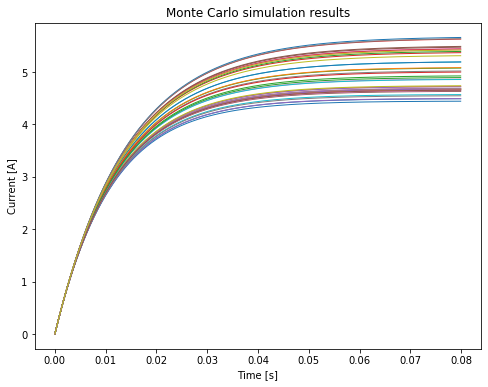

In [3]:
# Plots
# Time vector
t = np.arange(0, npoint)*Ts

plt.figure(figsize=(8,6))
for j in np.arange(0,N-1):
    plt.plot(t,I[j,:], linewidth=1)

plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.title('Monte Carlo simulation results')
plt.show()

## Classical Polynomial Chaos

### Polynomial Chaos (PC) expansion 

PC expansion of $R$:   
$R = \sum_{i=0}^{P}R_i\Phi_i(\xi) = R_0\Phi_0(\xi) + R_1\Phi_1(\xi)$ 

PC expansion of $i(t)$:  
$I = \sum_{i=0}^{P}I_i(t)\Phi_i(\xi) = I_0(t)\Phi_0(\xi) + I_1(t)\Phi_1(\xi)$  

Circuit solution:    
$I(k) = (1-T_s*R/L) * I(k-1) + Ts/L*E = I(k-1) - T_s/L*R*I(k-1) + Ts/L*E$ 

Replacing $R$ and $I$ to the solution equation:  
$\sum_{i=0}^{P}I_i(k)\Phi_i = \sum_{i=0}^{P}I_i(k-1)\Phi_i - T_s/L\sum_{i=0}^{P}\sum_{j=0}^{P}R_i*I_j(k-1)\Phi_i\Phi_j + T_s/L*E$

Applying Galerkin projection on the PC basis and by replcing integrals with inner products:   
$\sum_{i=0}^{P}I_i(k)<\Phi_i\Phi_s>  =  \sum_{i=0}^{P}I_i(k-1)<\Phi_i\Phi_s> - T_s/L\sum_{i=0}^{P}\sum_{j=0}^{P}R_i*I_j(k-1)<\Phi_i
\Phi_j\Phi_s> + T_s/L*E$

Inner product of two orthogonal polynomials can be replaced by the following identity:   
$<\Phi_i\Phi_s> = <\Phi_s^2>\delta_{is}$  
where $\delta_{is}$ is Kronecker delta.   

The following can be obtained:   
$\sum_{i=0}^{P}I_i(k)<\Phi_s^2>\delta_{is}  =  \sum_{i=0}^{P}I_i(k-1)<\Phi_s^2>\delta_{is} - T_s/L\sum_{i=0}^{P}\sum_{j=0}^{P}R_i*I_j(k-1)<\Phi_i\Phi_j\Phi_s> + T_s/L*E$

Kronecker delta reduces elements in summations in the following:    
$I_s(k)<\Phi_s^2> = I_s(k-1)<\Phi_s^2> - T_s/L\sum_{i=0}^{P}\sum_{j=0}^{P}R_i*I_j(k-1)<\Phi_i\Phi_j\Phi_s> + T_s/L*E$

The PC expansion of the circuit solution is:  
$I_s(k) = I_s(k-1) - T_s/L\frac{1}{<\Phi_s^2>}\sum_{i=0}^{P}\sum_{j=0}^{P}R_i*I_j(k-1)<\Phi_i\Phi_j\Phi_s> + T_s/L*E$

#### Matching of PDF types and orthogonal polynomials

Uniform distribution of parameter -> Legendre polynomial

Order of PC expansion:    
$P = 1$  

Non-zero inner products for Legendre polynomials:  
$<\Psi_0\Psi_0> = 1$  
$<\Psi_1\Psi_1> = 1/3$  
$<\Psi_0\Psi_0\Psi_0> = 1$   
$<\Psi_0\Psi_1\Psi_1> = <\Psi_1\Psi_0\Psi_1> = <\Psi_1\Psi_1\Psi_0> = 1/3$

The first order PC expansion of the circuit solution is the following:   
$s=0$  
$I_0(k) = (1-T_s*R_0/L) * I_0(k-1) - T_s/L/3*R_1*I_1(k-1) + Ts/L*E$ 

$s=1$  
$I_1(k) = -T_s/L*R_1*I_0(k-1) - (1-T_s*R_0/L)*I_1(k-1)$ 

#### Calculation of PC coefficients

In [4]:
# P-th order PC expansioin
P=1
# Number of coefficients in PC expansioin
M=P+1

# Solution vector for PC
# Each row refers to a solution vector obtained for a PC coefficient
I_pct = np.zeros((M, npoint))

# Matrix for solution equation
Gh = np.array([ [(1-Ts*R0/L),  -Ts*R1/L/3], 
                [-Ts*R1/L,     (1-Ts*R0/L)]])
                             
# Simulation time loop
for k in np.arange(1,npoint):
    # Euler Forward used for discretization 
    I_pct_k = np.reshape(np.matmul(Gh, I_pct[:,k-1]), (M,1))  + np.array([ [Ts/L*E], [0]])
    I_pct[0,k] = I_pct_k[0,0]
    I_pct[1,k] = I_pct_k[1,0]

### Reconstruction of uncertain variable based on PC coefficients

Legendre polynomial of order $1$:   
$\Phi(\xi) = \Phi_0(\xi) + \Phi_1(\xi) = 1 + \xi$

$I = \sum_{i=0}^{P}I_i\Phi_i(\xi) = I_0\Phi_0(\xi) + I_1\Phi_1(\xi) = I_0 + I_1\xi$  


### Plots

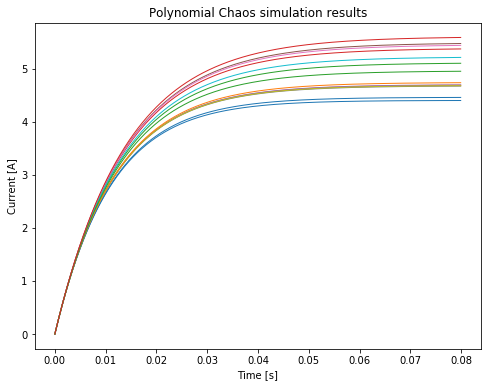

In [5]:
# Time vector
t = np.arange(0, npoint)*Ts
# Solution vector
i_pct = np.zeros((M, npoint))

# Number of reconstructions
K = 15
plt.figure(figsize=(8,6))
for j in np.arange(0,K-1):
    # Reconstruction of random behaviour of I based on PC expansioin coefficients 
    i_pct = I_pct[0,:] + I_pct[1,:]*rand_var[j]
    plt.plot(t,i_pct, linewidth=1)

plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.title('Polynomial Chaos simulation results')
plt.show()